In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

x = np.array([0,1,2,3,4])
y = x*2 +1

Using TensorFlow backend.


In [3]:
#모델 구성
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile('SGD', 'mse') #확률 적경사하강법, 평균제곱오차

#훈련
model.fit(x[:2], y[:2], epochs=1000, verbose=0)

# 확인
weights, bias = model.layers[0].get_weights()
print(weights, bias)

# 테스트
print('Targets:', y[2:])
print('Predictions:', model.predict(x[2:]).flatten())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[1.9815809]] [1.0113835]
Targets: [5 7 9]
Predictions: [4.9745455 6.956126  8.937707 ]


In [6]:
#####단순 회귀

# 데이터 준비
num_points = 1000
x_data = np.random.normal(0.0, 0.55, (num_points))
y_data = x_data * 0.1 + 0.3 + np.random.normal(0.0, 0.03, (num_points))

# 모델 구성
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile('SGD', 'mse')

# 훈련
history= model.fit(x_data, y_data, epochs=1000, verbose=0)

# 확인
weights, bias = model.layers[0].get_weights()
print(weights, bias)

[[0.10181142]] [0.30002198]


In [7]:
#테스트
test_indexs = np.random.choice(num_points, 10) #10개 무작위 추출
test_x = x_data[test_indexs]
test_y = y_data[test_indexs]
print('Targets :', test_y)

print('Predictions:', model.predict(test_x).flatten())

Targets : [0.38327174 0.30011525 0.25392698 0.23567883 0.32687532 0.37244297
 0.34766413 0.32790649 0.28989517 0.3470926 ]
Predictions: [0.38719237 0.31046227 0.27296302 0.24166882 0.32303375 0.3221166
 0.35973442 0.3777117  0.3273148  0.2937457 ]


In [16]:
#####다중 회귀
import matplotlib.pyplot as plt

# 데이터 준비
num_points = 1000
x_data = np.random.normal(0.0, 0.55, (num_points))
y_data = x_data * 0.1 + 0.3 + np.random.normal(0.0, 0.03, (num_points))

# 모델 구성
x_data = np.random.randn(2000, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

noise = np.random.randn(2000, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

noise = np.random.randn(1, 2000)*0.1
y_data = np.matmul(w_real, x_data.T) + b_real + noise
y_data = y_data.reshape(2000,1)

In [17]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(loss='mse', optimizer='sgd')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 훈련
history= model.fit(x_data, y_data, epochs=1000, verbose=0)

# 가중치, bias 확인
weights, bias = model.layers[0].get_weights()
print(weights, bias)

[[0.29790035]
 [0.4994587 ]
 [0.09871176]] [-0.19734246]


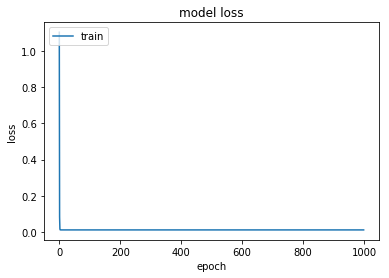

In [19]:
# history 시각화
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()